# Introducing Scikit-Learn

Package that provies efficient versions of a large number of common algoriths. Is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, swtiching a new model or algorithm is very straighforward.

We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussin how data can be represented in order to be understood by computer. The best way to think about dta within Scikit-Learn isin terms of tables of data.

### Data as a table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities realte to each of these elements. For example, consider the *iris dataset*.

In [2]:
import seaborn as sns 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data referes to a single observed flower, adn the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix *as features*, and the number of columns as `n_features`.

#### Features matrix

This table layout makes clear that the information can be thought of as two-dimensional numerical array or matrix, which we will call the *features matrix*. By conventin, this features matrix is often stored in a variable names `X`. The features matrix is assumed to be two-dimensiona, with shape `[n_samples, n_features]`, and is most ofent contained in a NumPY array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (columns) always refer to the distinct observations that describe each sample in aquantitative manner. Features are generally real-valued, byt may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix `X`, we also generally work with a `label` or `target` array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contanined in a NumPy array or Pandas `Series`. May have continuous numerical values, or discrete classes/labels. While some Scikit-Learn estimatos do handle multiple target values in the form of a two-dimensional, `[n_sampes, n_target]` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of conusion is how the target array differs from the other features columns. The distinguish feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable. For example, in the preceding data we may wish to construct model that can predict the species of lower based on the other measurements; in this cae, the `species` columns would be considered the target array.

With this target array in mind, we can use Seaborn to conveniently visualize the data:

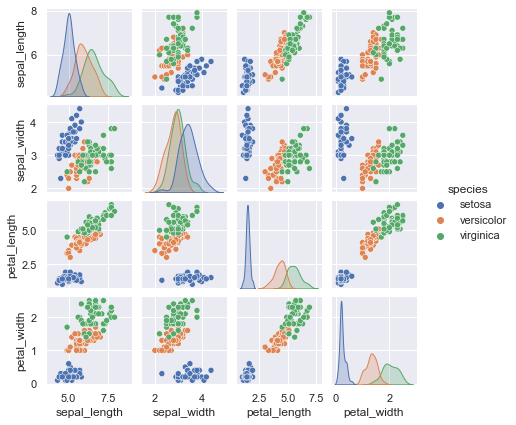

In [3]:
%matplotlib inline 
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](https://arxiv.org/abs/1309.0238):

- Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
- Inspection: All specified parameter values are xposed as public attributes.
- Limited object hierarchy: ONly algorithms are represented by Python classes; datasets are represented in standard formats(NumPy arrays, Pandas `DataFrame`s, SciP, sparse matrices) and paramters names use standard Python strings.
- Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
- Sensible defaults: When models require user-specified parameters, the library defines an appropriate defualt vale.

### Basics of the API 
Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailes exmaples in the sections that follow)

1. Chosose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above
4. Fit the model to your data by calling the `fit()` method o fthe model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the `predict()` method.
    - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

### Supervised learning example: Simple lienar regression

As an example of this process, let's consider a simple lienar regression-that is, the common case of fitting a line to (x,y) data. We will use the following simple data for our regression example:

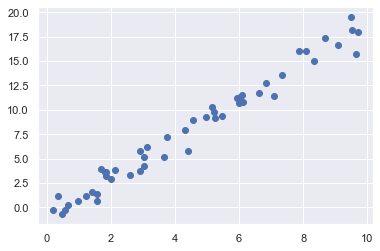

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outline earlier. Let's walk through the process:

#### 1. Choose a class of model

In Scikit-Lear, every class of model is represented by a Python class. So, for example, if we wuld like to compute a simple linear regression model, we can import the linear regresssion class:

In [7]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you an read more about them in the `sklearn.linear_model` documentation

#### 2. Choose model Hyperparameters

An important point is that a *class of model is notthe same as an instance of a model*.

Once we have decides on our model class, there are still some options open to use. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the to offset(i.e, y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularizati nwould we like to use in our model?
- How many model componetns would we like to use?

These are examples of the importan choices that must be made *once the model class is selected*. These choices are often represented as *hyperparameters*, or paramteres that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitavely motivate the choice of hyperparameters

Four our linear regression example, we can instantiate the `LinearRegression` class and spceify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very cleaer the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into afeatures matrix and target vector
Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Herw our target variable `y` is already in the correct form(a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`. In this case, this amounts to a simple reshaping of the one-dimensional araray:

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data
Now it is time to apply our model to data. This can be done with the `fit()` method of the model:

In [10]:
model.fit(X, y)

LinearRegression()

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specified attributes that the user can explore. In Scikit-Learn, by convention all model paramters that were learned durin the `fit()` process have trailing underscores; for example in this linear model, we have the following:

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.903310725531111

These two paramters represent the slpe and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

In general, Scikit-Learn does not provide tools to draw conlusions from internal model paramters themselves: interpreting model paramters is much more a *statistical modeling* question than a *machine learning* question. machine learning rather fouces on what the modle *predicts*. If you would like to divei nto the meaningo of fit parameters wihtin the model, other tools are available [Statsmodels Python package](https://www.statsmodels.org/stable/index.html)

#### 5. Predict labels for unknown data

Once hte model istrained, the main task of supervised machine learning isto evaluate it baed on what it sayws about new data that was not part of the training set. In Scikit-Learn, this can be done using the `predict()` method. For the sake of this example, our "new data"will be a grid of x values, and we weill ask that y values the model predicts:

In [13]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these x values into a `[n_samples, n_features]` fatures matrix, afeter which we can feed it to the model:

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting firest the raw data, and then this model fit:

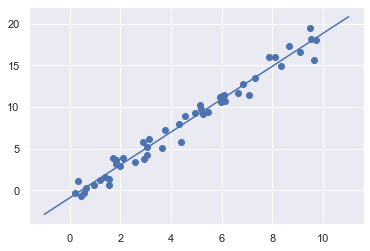

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Tipically the efficacy of the model is evaluted by comparing its results to some known baseline, as we will see in the next example.

### Supervised learnig exmple: Iris classification

Let's take a lookt at another example of this process, using the Iris dataset we discussed earlier. OUr question will be this: given a model trained on a portions of the Iris data, how well can we predict the remaining labels?

For this task, we weill use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is draw form an axis-aligned Gaussian distribution. Is fast and has no hyperparameters to choose, Gaussian naive Bayes is ofent a good model to use as a baseline classification,before exploring wheter imporvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen beofre, and so we will splot the data into a *training set* and a *testint set*. This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

With the data arranged, we can follow our recipe to predic the labels:

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
model = GaussianNB()
model.fit(Xtrain, ytrain)


GaussianNB()

In [23]:
y_predict = model.predict(Xtest)

Finally, we can use the `accuray_score` utility to see the fraction of predicted labels that match their true value:

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_predict)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset.

### Unsupervised learning example: Iris dimensionality

As an example of an usupervised learning problem, let's take a lookt at reducing the dimensionality of the iris data so as to more easily visualize it. Recall that the Iris data is four dimensional.

The task of dimensionality reduction is to ask wheter there isa suitable lower-dimensional representation taht reatians the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimeniosn or higher.

Here we will use principal componet analysis (PCA) which is a fast linear dimensionality reduction technique. We will ask the model to return two componets, that is, a two-dimensional representation of the data.

In [28]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

Now let's plot the results. A quick way to do this is to insert the results into the original Iris `DataFrame`, and use Seaborn's `lmplot` to show the results:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


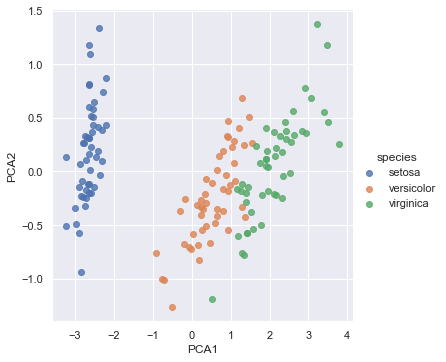

In [29]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm ad no knowledge of the species labels! This indicates to use that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model(GMM). A GMM attemps to model thedata as acollection of Gaussian blobs.

In [32]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

As before, we will add the cluster label to the iris `DataFrame` and use SEaborn to plot the results:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


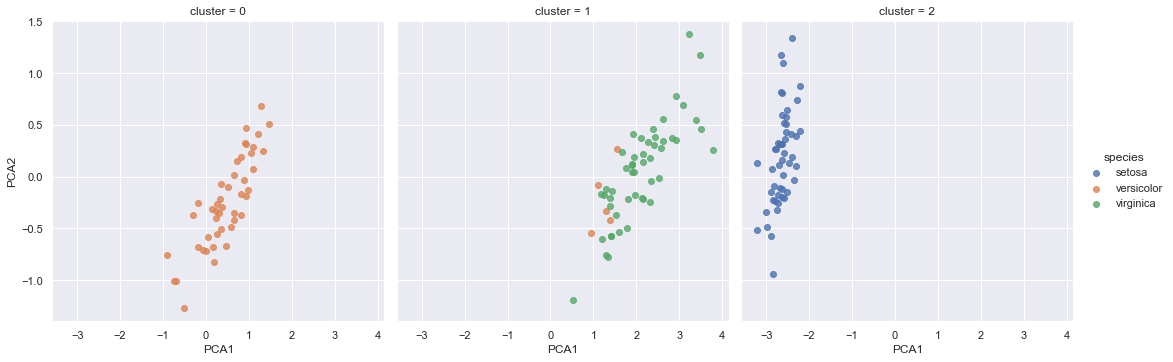

In [37]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

By splitting the dat aby cluster number, we see exactly how well the GMM algorithm has recovered the underlying label. This sort of alogirhtm might further give expertes in the field clues as to the realtionship between the samples they are observing.

## Applicaton: Exploring Hand-written Digits

To demonstrate these principles on a more intersting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.

In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [39]:
from sklearn.datasets import load_digits
digits= load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array, 1,797 samples each consisting of an 8x8 grid of picels. Let's visualize the first hundred of these:

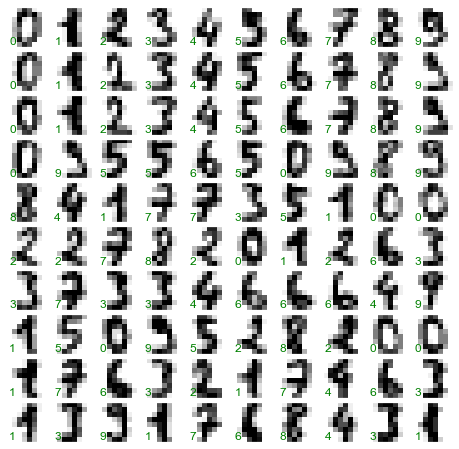

In [49]:
import matplotlib.pyplot as plt 

figx, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes,  color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, `[n_samples, n_features]` representation. We can accomplish this by trating each pixel in the image as feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representation each digit. We need the target array, which gives the previously determinded label for each digit. These two quantities are built into the digits dataset under the `data` and `target` attributes, respectively:

In [41]:
X = digits.data 
X.shape

(1797, 64)

In [42]:
y = digits.target 
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead we'll reduce the dimenionsto 2, using an unsupervised method. Here, we'll make use of a manifold learnig alogirhtm called *Isomap*, and transform the data to two dimensions:

In [50]:
from sklearn.manifold import Isomap

In [52]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional. Let's plot this data to see if we can learn anythin from its structure:

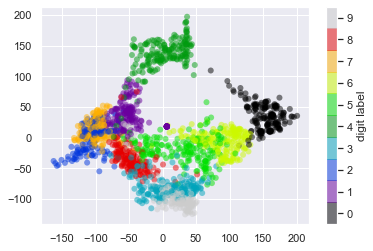

In [59]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well varius numbers are separated in the larger 64-dimensional espace.

### Classification on digits

Let's apply a classification algorithm to the digits. As with the Iris data previously, we wil split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [60]:
X_train, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we ccan gauge its accuracy by comparing the true values of the test set to the predictions:

In [65]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simpe model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us *where * we've gone wrong - one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

In [66]:
from sklearn.metrics import confusion_matrix

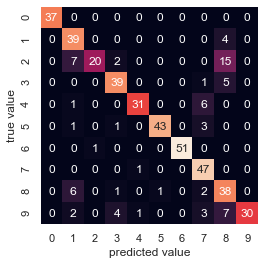

In [68]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the miss-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot hte inputs again, with their predicted labels. We'll use green for correct lables, and red for incorrect labels:

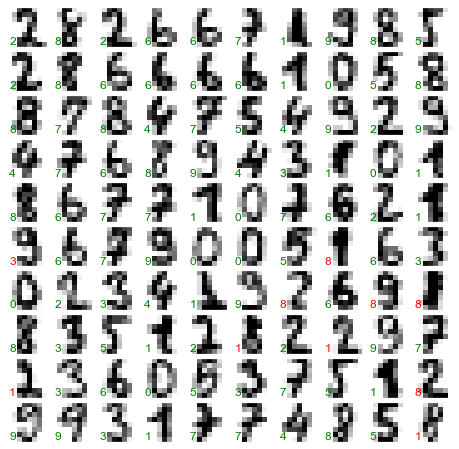

In [69]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
    color='green' if (ytest[i] == y_model[i]) else 'red')

Examinign this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm suc as support vector machines, random forests or naother classification approach.